✅ Датасет 'ZNO_NMT_clean.csv' завантажено.


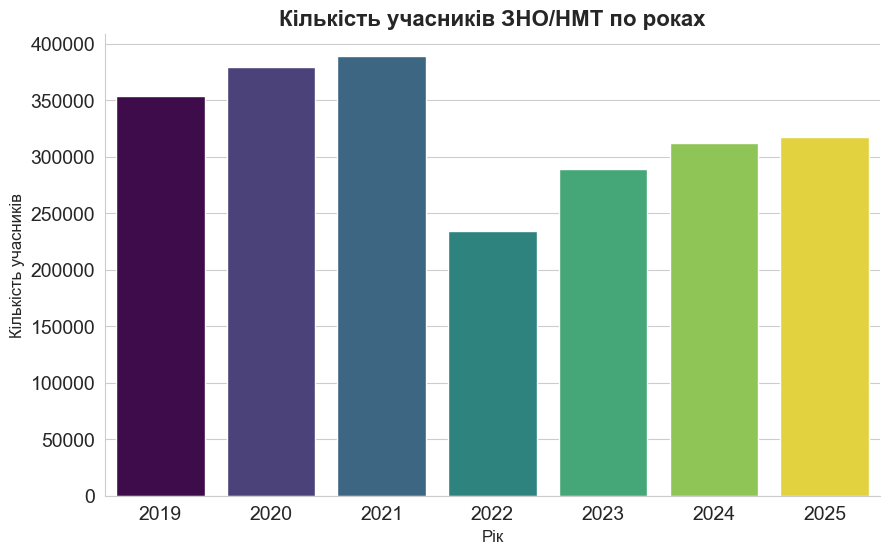

✅ Графік успішно збережено у файл 'participants_by_year.png' з прозорим фоном.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

input_filename = "ZNO_NMT_clean.csv"
output_image_filename = "participants_by_year.png"

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14

try:
    df = pd.read_csv(input_filename, low_memory=False)
    print(f"✅ Датасет '{input_filename}' завантажено.")
except FileNotFoundError:
    print(f"❌ ПОМИЛКА: Файл '{input_filename}' не знайдено.")
    df = None

if df is not None:
    fig, ax = plt.subplots()

    sns.countplot(
        x='Year',
        data=df,
        order=sorted(df['Year'].unique()),
        palette='viridis',
        ax=ax,
        hue='Year',
        legend=False
    )

    ax.set_title('Кількість учасників ЗНО/НМТ по роках', fontsize=16, weight='bold')
    ax.set_xlabel('Рік', fontsize=12)
    ax.set_ylabel('Кількість учасників', fontsize=12)

    sns.despine()

    plt.show()

    try:
        fig.savefig(output_image_filename, transparent=True, dpi=300)
        print(f"✅ Графік успішно збережено у файл '{output_image_filename}' з прозорим фоном.")
    except Exception as e:
        print(f"❌ Виникла помилка при збереженні зображення: {e}")

✅ Універсальна колонка 'AvgScore' успішно створена.
Групування та візуалізація...


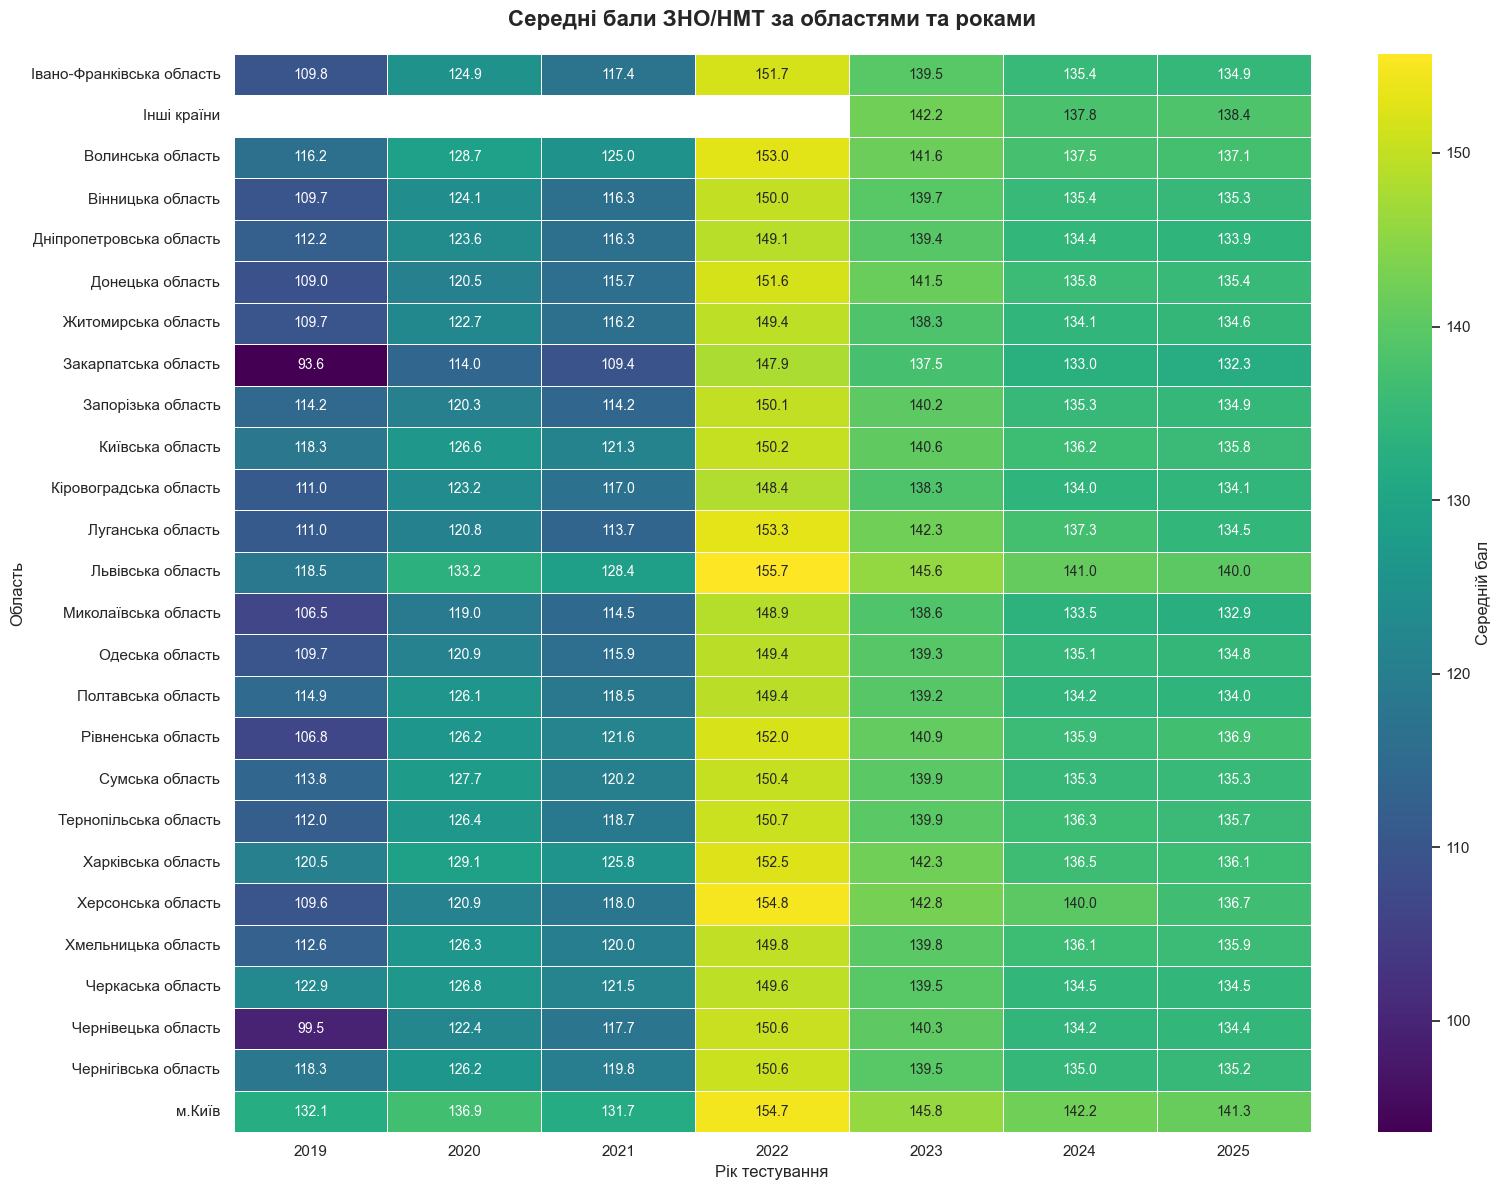

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 10

df = pd.read_csv("ZNO_NMT_clean.csv", low_memory=False)


zno_cols = ['UkrBall100', 'HistBall100', 'MathBall100', 'EngBall100', 'BioBall100', 'GeoBall100', 'PhysBall100', 'ChemBall100']
nmt_2022_cols = ['Block1Ball100', 'Block2Ball100', 'Block3Ball100']
nmt_2023_plus_cols = zno_cols

conditions = [
    df['Year'].isin([2019, 2020, 2021]),
    df['Year'] == 2022,
    df['Year'].isin([2023, 2024, 2025])
]

choices = [
    df[zno_cols].mean(axis=1, skipna=True),
    df[nmt_2022_cols].mean(axis=1, skipna=True),
    df[nmt_2023_plus_cols].mean(axis=1, skipna=True)
]

df['AvgScore'] = np.select(conditions, choices, default=np.nan)
print("✅ Універсальна колонка 'AvgScore' успішно створена.")

print("Групування та візуалізація...")
regional_performance = df.groupby(['Region', 'Year'])['AvgScore'].mean().unstack()

plt.figure(facecolor='none')
sns.heatmap(
    regional_performance,
    annot=True, fmt=".1f", cmap="viridis", linewidths=.5, cbar_kws={'label': 'Середній бал'}
)
plt.title('Середні бали ЗНО/НМТ за областями та роками', fontsize=16, weight='bold', pad=20)
plt.xlabel('Рік тестування', fontsize=12)
plt.ylabel('Область', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

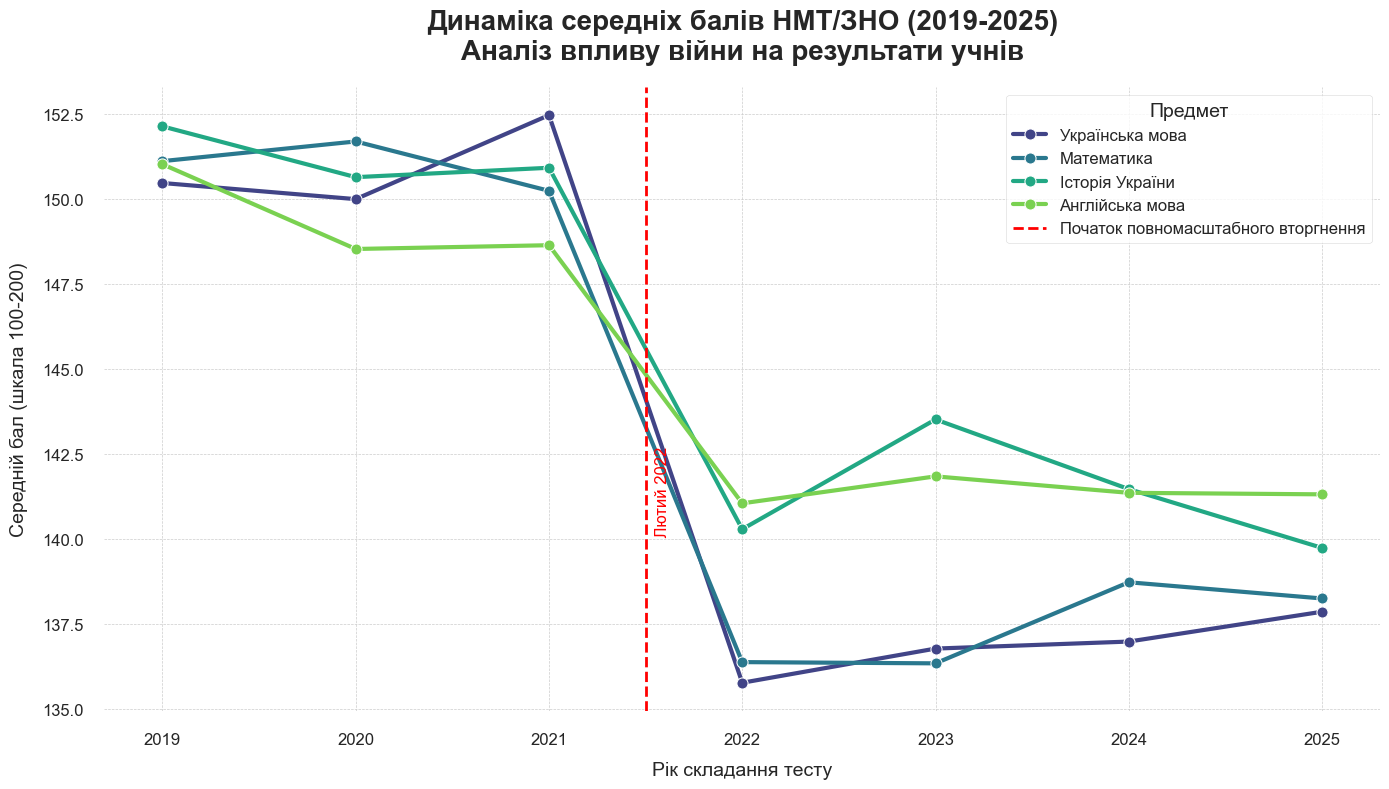

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = {
    'Year': np.random.randint(2019, 2026, size=5000),
    'UkrBall100': np.random.randint(100, 201, size=5000),
    'MathBall100': np.random.randint(100, 201, size=5000),
    'HistBall100': np.random.randint(100, 201, size=5000),
    'EngBall100': np.random.randint(100, 201, size=5000)
}
df = pd.DataFrame(data)

df.loc[df['Year'] >= 2022, ['UkrBall100', 'MathBall100', 'HistBall100', 'EngBall100']] -= np.random.randint(5, 15, size=4)

yearly_avg_scores = df.groupby('Year').agg({
    'UkrBall100': 'mean',
    'MathBall100': 'mean',
    'HistBall100': 'mean',
    'EngBall100': 'mean'
}).reset_index()

yearly_avg_scores.rename(columns={
    'UkrBall100': 'Українська мова',
    'MathBall100': 'Математика',
    'HistBall100': 'Історія України',
    'EngBall100': 'Англійська мова'
}, inplace=True)


sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-talk')

fig, ax = plt.subplots(figsize=(14, 8))

subjects = ['Українська мова', 'Математика', 'Історія України', 'Англійська мова']

sns.lineplot(data=pd.melt(yearly_avg_scores, ['Year']), x='Year', y='value', hue='variable',
             palette='viridis', linewidth=3, marker='o', markersize=8, ax=ax)



ax.axvline(x=2021.5, color='red', linestyle='--', linewidth=2, label='Початок повномасштабного вторгнення')
ax.text(2021.55, ax.get_ylim()[0] + 5, ' Лютий 2022', color='red', rotation=90,
        verticalalignment='bottom', fontsize=12)

ax.set_title('Динаміка середніх балів НМТ/ЗНО (2019-2025)\nАналіз впливу війни на результати учнів',
             fontsize=20, weight='bold', pad=20)
ax.set_xlabel('Рік складання тесту', fontsize=14, labelpad=10)
ax.set_ylabel('Середній бал (шкала 100-200)', fontsize=14, labelpad=10)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticks(yearly_avg_scores['Year'])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='Предмет', fontsize=12, title_fontsize=14)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()